📱 **Welcome to My Mobile Device Usage and User Behavior Analysis Portfolio!** 🌟  

How do people of different ages, genders, and preferences interact with their mobile devices? In this project, I dove into a rich dataset from Kaggle that explores **mobile device usage patterns and user behavior classification**. With 700 samples of user data, this dataset provides fascinating insights into **app usage time, screen-on time, battery drain, data consumption**, and more!  

To ensure accuracy and reliability, I began with **data wrangling** 🛠️—cleaning up missing values, fixing data types, and removing duplicates. Next, I performed **Exploratory Data Analysis (EDA)** 🔍 to uncover meaningful trends and patterns. Then, I set out to answer some compelling questions that shine a light on user habits:  

- 📱 **Device Models and Age Groups:** How much time does each device model in different age groups spend on mobile applications, and how many apps do they install?  
- ⚡ **Screen Time & Battery Drain:** Is there a correlation between screen time and battery drain?  
- 📊 **Gender Analysis:** How much time does each gender spend on mobile applications, and how many apps do they install?  
- 📲 **App Installation & Battery Drain:** Does the number of installed apps affect battery drain?  
- 🖥️ **Operating Systems:** Which operating system is the most popular among users?  
- 🌐 **Gender & Data Usage:** Is there a correlation between gender and mobile data usage?  

This project offers a deep dive into how individuals engage with their mobile devices and the key factors that influence behavior. Let’s uncover the hidden dynamics behind every screen tap and unlock valuable insights into user preferences and habits! 📈✨

# Gathering Data

Data Source : https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
user_behavior_df = pd.read_csv('user_behavior_dataset.csv')
user_behavior_df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Data Wrangling

In [5]:
user_behavior_df.info()
# from .info() function we know that we dont have any missing value on this dataset
# and also if we look into this datframe, we know that all the data already on the right format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
print('duplicated data: ',user_behavior_df.duplicated().sum())
# with this code we try to check is there any duplicated value inside this data frame

duplicated data:  0


In [7]:
user_behavior_df.describe(include="all")

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


**Insights from the Data**  

1. **Device Model**  
   - The most commonly used device model is **Xiaomi Mi 11**, with a frequency of **146 users**.  

2. **Operating System**  
   - The most popular operating system among users is **Android**, with a frequency of **554 users**.  

3. **Daily Time Spent on Mobile Applications**  
   - Ranges from a minimum of **30 minutes** to a maximum of nearly **10 hours**, with an average of **4.5 hours**.  

4. **Screen Active Time**  
   - The average screen active time per day ranges from a minimum of **5 hours** to a maximum of **12 hours**.  

5. **Daily Battery Consumption**  
   - Ranges from a minimum of **722 mAh** to a maximum of **2,993 mAh**, with an average of **1,525 mAh**.  

6. **Number of Installed Applications**  
   - Ranges from a minimum of **10** to a maximum of **99** applications.  

7. **Daily Data Usage**  
   - Ranges from a minimum of **102 MB** to a maximum of **2,497 MB**, with an average of **929 MB**.  

8. **User Age Range**  
   - Users' ages range between **18 and 59 years old**.

In [8]:
user_behavior_df.columns = ['user_id', 'device_model','operating_system','app_usage_time', 'screen_on_time','battery_drain', 'number_of_installed_apps',
                            'data_usage', 'age','gender','user_behavior_class']

In [9]:
user_behavior_df = user_behavior_df.loc[ : , user_behavior_df.columns != 'user_behavior_class']

# EDA

In [10]:
user_behavior_df.groupby(by="device_model").user_id.nunique().sort_values(ascending=False)

,user_id
device_model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


**Device Model Usage**  

- The most commonly used device models are **Xiaomi Mi 11** and **iPhone 12**, each with **146 users**.  
- The least used device model is the **Samsung Galaxy S21**, with **133 users**.  

In [11]:
user_behavior_df['age_group'] = user_behavior_df.age.apply(lambda x: "Youth" if x <=24 else ("Seniors" if x > 64 else "Adults"))
# we want to grouping user age into youth(<=24 years old), seniors (> 64), and adults (25 <= 64 years old)

In [12]:
device_model_df = user_behavior_df.groupby(by="device_model").user_id.nunique().sort_values(ascending=False).reset_index()

In [13]:
operating_system_df = user_behavior_df.groupby(by='operating_system').user_id.nunique().sort_values(ascending=False).reset_index()
operating_system_df.columns = ['operating_system','number_of_user']

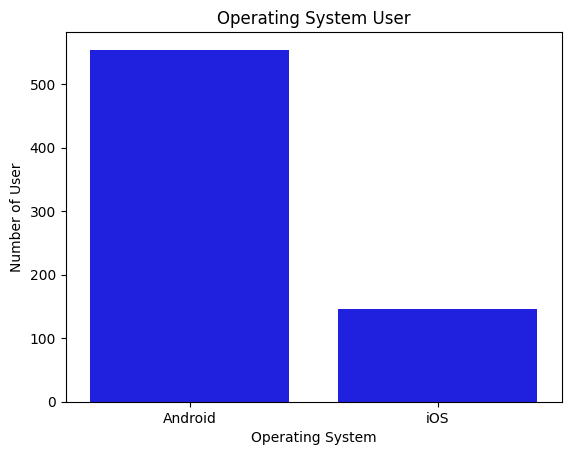

In [14]:
sns.barplot(y=operating_system_df['number_of_user'], x = operating_system_df['operating_system'], orient='v', color='blue')
plt.xlabel('Operating System')
plt.ylabel('Number of User')
plt.title('Operating System User')
plt.show()

In [15]:
operating_system_df

,operating_system,number_of_user
0,Android,554
1,iOS,146


**Operating System Usage**  

- The majority of users in this dataset use **Android**, with a total of **554 users**.  
- In comparison, **iOS** is used by **146 users**.

# Question

1. How much each device model in each age group spent their time on mobile application and how many number of app that their installed?
2. How much each gender spent their time on mobile application and how many app that their installed?
3. Is there any correlation between screen time and battery drain?
4. Is there any correlation between the number of app that got installed and battery drain?
5. What operating system that user using the most?
6. Is there any correlation between Gender and Data usage?

In [16]:
# How much each device model in each age group spent their time on mobile application and how many number of app that their installed?
user_behavior_df.groupby(by=['device_model','age_group']).agg({
    'app_usage_time' : ['min', 'max', 'mean'],
    'number_of_installed_apps' : ['min','max']
})

app_usage_time                   \
                                        min  max        mean   
device_model       age_group                                   
Google Pixel 5     Adults                35  595  265.777778   
                   Youth                 34  586  277.200000   
OnePlus 9          Adults                30  598  266.035088   
                   Youth                 42  558  296.473684   
Samsung Galaxy S21 Adults                30  593  249.867257   
                   Youth                 32  537  359.950000   
Xiaomi Mi 11       Adults                31  597  270.725806   
                   Youth                 37  545  255.636364   
iPhone 12          Adults                32  597  277.040984   
                   Youth                 32  559  307.333333   

                             number_of_installed_apps      
                                                  min max  
device_model       age_group                               
Google Pixel 5     Adults                          10  99  
                   Youth                           10  99  
OnePlus 9          Adults                          10  99  
                   Youth                           14  97  
Samsung Galaxy S21 Adults                          10  99  
                   Youth                           19  94  
Xiaomi Mi 11       Adults                          10  98  
                   Youth                           10  91  
iPhone 12          Adults                          10  99  
                   Youth                           13  97

**Insights from the Data**

1. **Daily Time Spent on Mobile Applications**  
   - **Adults** using the **OnePlus 9** have the lowest daily time spent on mobile applications, averaging **30 minutes per day**.  
   - **Youths** using the **iPhone 12** and **Samsung Galaxy S21** share the lowest daily time spent on mobile applications, averaging **32 minutes per day**.  

2. **Number of Installed Applications (Youth Users)**  
   - **Youth users** of the **Samsung Galaxy S21** have the highest minimum number of installed applications, with at least **19 apps** on their phones.  

3. **Google Pixel 5** (Youth and Adult Users)  
   - Both **youths** and **adults** using the **Google Pixel 5** have the same minimum and maximum number of installed applications on their phones.

In [17]:
user_behavior_df.groupby(by='gender').agg({
    'app_usage_time' : ['min', 'max'],
    'number_of_installed_apps' : ['min','max']
})

app_usage_time      number_of_installed_apps    
                  min  max                      min max
gender                                                 
Female             31  598                       10  99
Male               30  595                       10  99

**Insights on Daily Time Spent and Installed Applications by Gender**

1. **Daily Time Spent on Mobile Applications**  
   - **Female users** have a higher **minimum** daily time spent on mobile applications, at **31 minutes**, compared to male users.  
   - **Male users** have a higher **maximum** daily time spent on mobile applications, reaching up to **9 hours**, compared to female users.  

2. **Number of Installed Applications**  
   - Both **male** and **female users** share the same range for the number of installed applications on their phones, with a **minimum of 10 apps** and a **maximum of 99 apps**.

In [18]:
np.corrcoef(user_behavior_df['screen_on_time'], user_behavior_df['battery_drain'])

array([[1.        , 0.94898314],
       [0.94898314, 1.        ]])

**Correlation Between Screen Time and Battery Drain**  

From the data, we can observe a strong correlation between **screen time on the phone** and **battery drain**, with a correlation coefficient of **0.94898314**.  

This indicates that larger values of screen time are associated with higher battery drain, and conversely, lower screen time corresponds to lower battery consumption.  

In [19]:
np.corrcoef(user_behavior_df['number_of_installed_apps'], user_behavior_df['battery_drain'])

array([[1.        , 0.96185326],
       [0.96185326, 1.        ]])

**Correlation Between Number of Installed Apps and Battery Drain**  

From the data, we observe a strong correlation between the **number of installed apps** on the phone and **battery drain**, with a correlation coefficient of **0.96185326**.  

This suggests that a higher number of installed apps is associated with greater battery consumption, and conversely, fewer installed apps are linked to lower battery drain.

In [20]:
operating_system_df = user_behavior_df.groupby(by="operating_system").user_id.nunique().sort_values(ascending=False).reset_index()

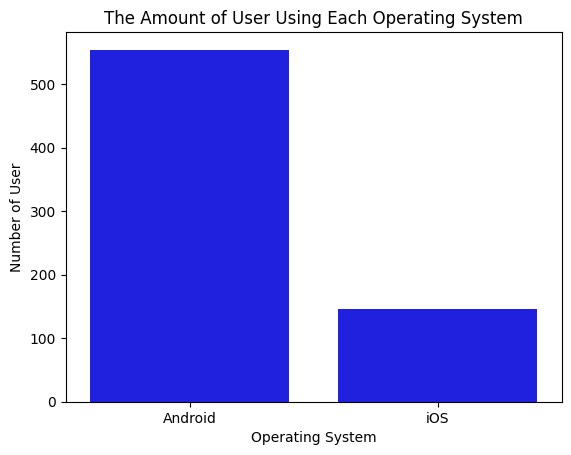

In [21]:
sns.barplot(y= operating_system_df['user_id'], x = operating_system_df['operating_system'], orient='v', color='blue')
plt.xlabel('Operating System')
plt.ylabel('Number of User')
plt.title('The Amount of User Using Each Operating System')
plt.show()

In [22]:
operating_system_df

,operating_system,user_id
0,Android,554
1,iOS,146


**Operating System Usage**  

- The majority of users in this dataset use **Android**, with a total of **554 users**.  
- In comparison, **iOS** is used by **146 users**.  


In [23]:
import scipy.stats
print('the amount of correlation is: ',scipy.stats.spearmanr(user_behavior_df['data_usage'], user_behavior_df['gender']).correlation)

the amount of correlation is:  0.012728418452530223


**Correlation Between Data Usage and Gender**  

From the data, we observe that **data usage** has a very weak correlation with **gender**, with a correlation coefficient of **0.012728418452530223**.  

This indicates that data usage is not significantly influenced by gender.
